<a href="https://colab.research.google.com/github/sampiecz/490_ASSN3/blob/master/ASSN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and dataset generation.

In [37]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
 
num_observations = 10000
x1 = np.random.multivariate_normal([0,0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x2 = np.random.multivariate_normal([3,3], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x3 = np.random.multivariate_normal([3,0], [[0.1, 0.2], [0.2, 0.1]], num_observations)
x4 = np.random.multivariate_normal([0,3], [[0.1, 0.2], [0.2, 0.1]], num_observations)
features = np.vstack((x1, x2, x3, x4)).astype(np.float32)
labels = np.hstack((np.full(num_observations, 0), np.full(num_observations,1), np.full(2*num_observations, 2)))
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: covariance is not positive-semidefinite.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: covariance is not positive-semidefinite.
  # This is added back by InteractiveShellApp.init_path()


Features and labels XOR data vis

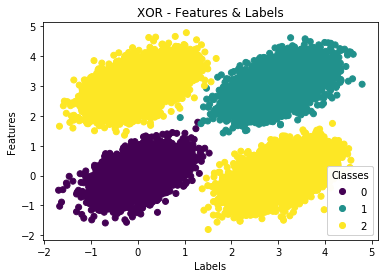

In [38]:
# XOR data vis.  
fig, ax = plt.subplots()
ax.set_ylabel("Features")
ax.set_xlabel("Labels")
scatter = ax.scatter(features[5000:, 0], features[5000:, 1], c=labels[5000:])
plt.title("XOR - Features & Labels")
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)

# Testing and Training data visualization

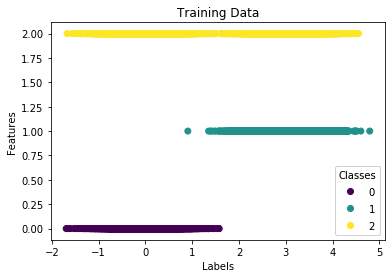

In [39]:

# Training data.
fig, ax = plt.subplots()
ax.set_ylabel("Features")
ax.set_xlabel("Labels")
scatter = ax.scatter(X_train[:,0], y_train, c=y_train)
plt.title("Training Data")
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)
plt.show()



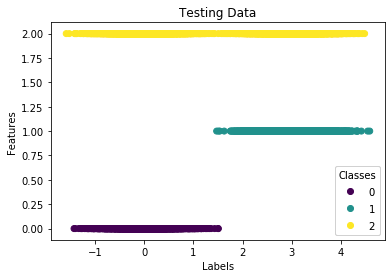

In [40]:
# Testing
fig, ax = plt.subplots()
ax.set_ylabel("Features")
ax.set_xlabel("Labels")
scatter = ax.scatter(X_test[:,0], y_test, c=y_test)
plt.title("Testing Data")
legend = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend)
plt.show()

Model 1 - Build, compile, fit, evaluate

In [41]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation="relu"),
      tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_split=.1, epochs=5)
model.evaluate(X_test, y_test, verbose=2)

Train on 24120 samples, validate on 2680 samples
Epoch 1/5
24120/24120 [==============================] - 1s 60us/sample - loss: 0.8335 - acc: 0.7415 - val_loss: 0.1176 - val_acc: 0.9903
Epoch 2/5
24120/24120 [==============================] - 1s 53us/sample - loss: 0.1085 - acc: 0.9799 - val_loss: 0.0391 - val_acc: 0.9963
Epoch 3/5
24120/24120 [==============================] - 1s 52us/sample - loss: 0.0649 - acc: 0.9841 - val_loss: 0.0215 - val_acc: 0.9970
Epoch 4/5
24120/24120 [==============================] - 1s 51us/sample - loss: 0.0511 - acc: 0.9856 - val_loss: 0.0136 - val_acc: 0.9978
Epoch 5/5
24120/24120 [==============================] - 1s 52us/sample - loss: 0.0430 - acc: 0.9865 - val_loss: 0.0102 - val_acc: 0.9981
13200/13200 - 0s - loss: 0.0104 - acc: 0.9984


[0.01035144478054435, 0.9984091]

Plot Decision Boundary for Model 1

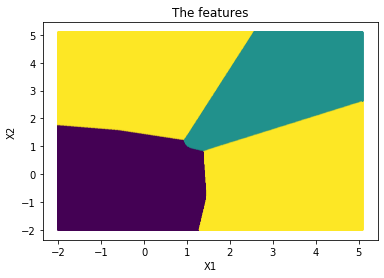

In [42]:
def plot_decision_boundary(X, Y, model):
  X, Y = np.mgrid[-2:5.1:0.01, -2:5.1:0.01]
  xy = np.vstack((X.flatten(), Y.flatten())).T
  testDataY1 = model.predict_classes(xy)
  marker_size=1
  plt.scatter(xy[:,0], xy[:,1], marker_size, c=testDataY1)
  plt.title("The features")
  plt.xlabel("X1")
  plt.ylabel("X2")
  plt.show()

plot_decision_boundary(features, labels, model)

Plot Model 1 accuracy and loss

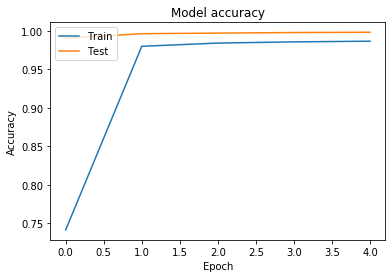

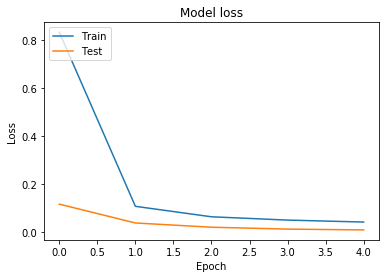

In [43]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Repeat process for Model 2

Train on 24120 samples, validate on 2680 samples
Epoch 1/5
24120/24120 [==============================] - 1s 62us/sample - loss: 0.8254 - acc: 0.8172 - val_loss: 0.0876 - val_acc: 0.9892
Epoch 2/5
24120/24120 [==============================] - 1s 53us/sample - loss: 0.0706 - acc: 0.9875 - val_loss: 0.0276 - val_acc: 0.9966
Epoch 3/5
24120/24120 [==============================] - 1s 53us/sample - loss: 0.0362 - acc: 0.9924 - val_loss: 0.0127 - val_acc: 0.9985
Epoch 4/5
24120/24120 [==============================] - 1s 53us/sample - loss: 0.0249 - acc: 0.9939 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 5/5
24120/24120 [==============================] - 1s 54us/sample - loss: 0.0174 - acc: 0.9958 - val_loss: 0.0048 - val_acc: 1.0000
13200/13200 - 0s - loss: 0.0047 - acc: 0.9995


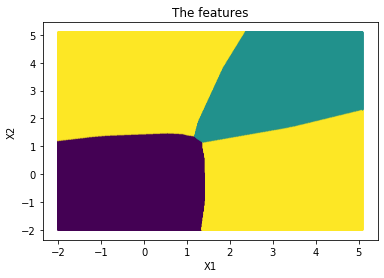

In [44]:
model2 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(20, activation="relu"),
      tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Dense(30, activation="softmax")
])
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model2.fit(X_train, y_train, validation_split=.1, epochs=5)
model2.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model2)

Plot Model 2 loss and accuracy

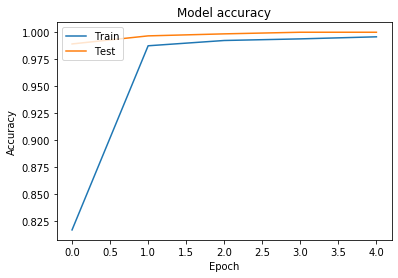

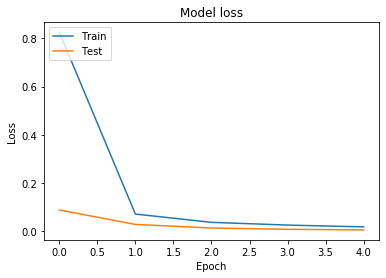

In [45]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Repeat process for Model 3

Train on 24120 samples, validate on 2680 samples
Epoch 1/5
24120/24120 [==============================] - 2s 70us/sample - loss: 1.0729 - acc: 0.6905 - val_loss: 0.1320 - val_acc: 0.9825
Epoch 2/5
24120/24120 [==============================] - 1s 60us/sample - loss: 0.3212 - acc: 0.8691 - val_loss: 0.0770 - val_acc: 0.9869
Epoch 3/5
24120/24120 [==============================] - 2s 64us/sample - loss: 0.2591 - acc: 0.8926 - val_loss: 0.0686 - val_acc: 0.9877
Epoch 4/5
24120/24120 [==============================] - 1s 60us/sample - loss: 0.2331 - acc: 0.9048 - val_loss: 0.0628 - val_acc: 0.9884
Epoch 5/5
24120/24120 [==============================] - 1s 61us/sample - loss: 0.2205 - acc: 0.9131 - val_loss: 0.0531 - val_acc: 0.9903
13200/13200 - 0s - loss: 0.0522 - acc: 0.9911


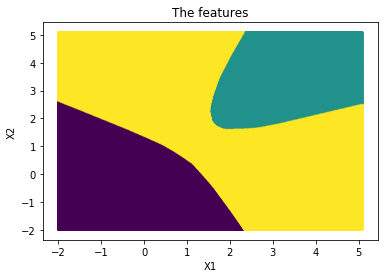

In [46]:
model3 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(50, activation="relu"),
      tensorflow.keras.layers.Dropout(0.8),
    tensorflow.keras.layers.Dense(50, activation="softmax")
])
model3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model3.fit(X_train, y_train, validation_split=.1, epochs=5)
model3.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model3)

Plot Model 3 loss and accuracy

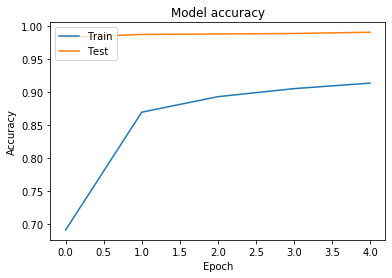

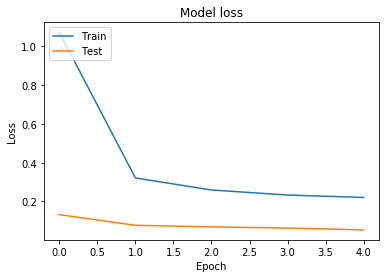

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Repeat process for Model 4

Train on 24120 samples, validate on 2680 samples
Epoch 1/5
24120/24120 [==============================] - 2s 71us/sample - loss: 0.5939 - acc: 0.9029 - val_loss: 0.0360 - val_acc: 0.9966
Epoch 2/5
24120/24120 [==============================] - 1s 56us/sample - loss: 0.0230 - acc: 0.9973 - val_loss: 0.0101 - val_acc: 0.9996
Epoch 3/5
24120/24120 [==============================] - 1s 58us/sample - loss: 0.0097 - acc: 0.9990 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 4/5
24120/24120 [==============================] - 1s 56us/sample - loss: 0.0056 - acc: 0.9993 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 5/5
24120/24120 [==============================] - 1s 57us/sample - loss: 0.0038 - acc: 0.9995 - val_loss: 0.0017 - val_acc: 1.0000
13200/13200 - 0s - loss: 0.0015 - acc: 0.9999


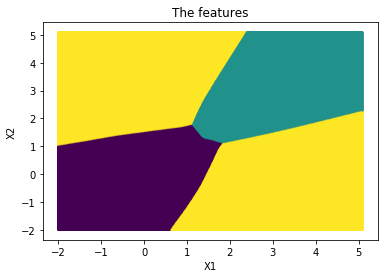

In [49]:
model4 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(50, activation="relu"),
      tensorflow.keras.layers.Dropout(0.1),
    tensorflow.keras.layers.Dense(50, activation="softmax")
])
model4.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model4.fit(X_train, y_train, validation_split=.1, epochs=5)
model4.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model4)

Plot Model 4 loss and accuracy

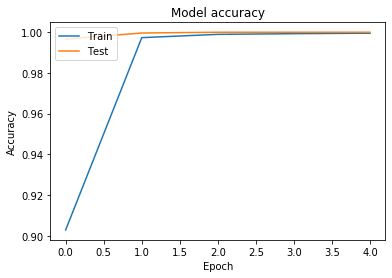

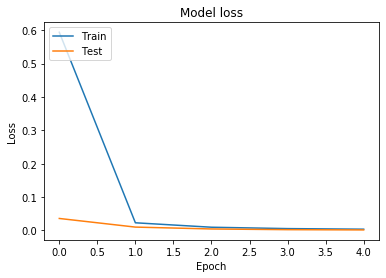

In [50]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Repeat process for Model 5

Train on 24120 samples, validate on 2680 samples
Epoch 1/5
24120/24120 [==============================] - 2s 86us/sample - loss: 0.5272 - acc: 0.9142 - val_loss: 0.0228 - val_acc: 0.9966
Epoch 2/5
24120/24120 [==============================] - 2s 68us/sample - loss: 0.0264 - acc: 0.9951 - val_loss: 0.0066 - val_acc: 0.9996
Epoch 3/5
24120/24120 [==============================] - 2s 69us/sample - loss: 0.0151 - acc: 0.9969 - val_loss: 0.0031 - val_acc: 1.0000
Epoch 4/5
24120/24120 [==============================] - 2s 67us/sample - loss: 0.0093 - acc: 0.9981 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 5/5
24120/24120 [==============================] - 2s 66us/sample - loss: 0.0072 - acc: 0.9984 - val_loss: 0.0016 - val_acc: 0.9996
13200/13200 - 0s - loss: 0.0016 - acc: 0.9999


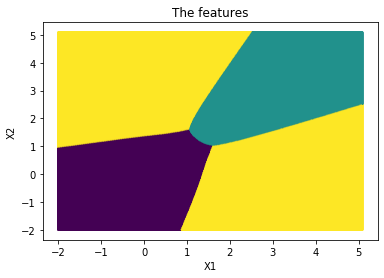

In [52]:
model5 = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(100, activation="relu"),
      tensorflow.keras.layers.Dropout(0.5),
    tensorflow.keras.layers.Dense(100, activation="softmax")
])
model5.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model5.fit(X_train, y_train, validation_split=.1, epochs=5)
model5.evaluate(X_test, y_test, verbose=2)
plot_decision_boundary(features, labels, model5)

Plot Model 5 loss and accuracy

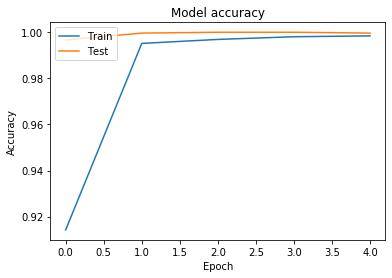

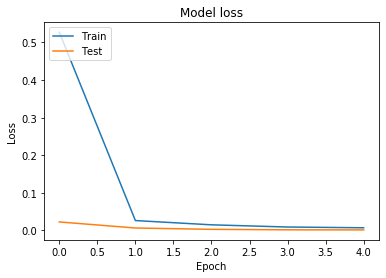

In [53]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()